In [ ]:
#We will be using an image classifier to differentiate between butterflies which are yummy to a bird, versus those that are not. 
#Our output label will be yum or yuck


#Importing the necessary libraries, and also the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

directory = "..archive/data/butterfly_mimics/"
os.listdir(directory)

for directory, dirnames, filenames in os.walk(directory):
    print("There are ", len(dirnames), "directories and ", len(filenames), "images in ", directory)

In [ ]:
#setting up the feature and labels matrix

training_images_dir = "../4661Final Project/archive/data/butterfly_mimics/images/"
testing_images_dir = "../4661Final Project/archive/data/butterfly_mimics/image_holdouts/"

#setting up the label matrix and checking the data output from file
butterfly_df = pd.read_csv("../4661Final Project/archive/data/butterfly_mimics/images.csv")
feature_cols = ['image','name', 'stage', 'side']
butterfly_feats = butterfly_df[feature_cols]
#print(butterfly_df.head())
#print(butterfly_df.describe())
#print(butterfly_feats)

butterfly_info_df = pd.read_csv("../4661Final Project/archive/data/butterfly_info.csv")
#print(butterfly_info_df)
yum_yuck_feat = ['Name', 'Yum ?']
yum_yuck_info = butterfly_info_df[yum_yuck_feat]
#print(yum_yuck_info)

#name_label = butterfly_df['name']
#print(name_label)

new_butterfly_df = pd.merge(butterfly_feats, yum_yuck_info, how="inner", left_on='name', right_on='Name')
print(new_butterfly_df)

label_cols = ['image', 'name', 'Yum ?']
label_df = new_butterfly_df[label_cols]
print(label_df)


          image       name  stage     side       Name Yum ?
0    ggc1e08cbc    monarch  adult  ventral    monarch  yuck
1    gh2d5c8c79    monarch  adult   dorsal    monarch  yuck
2    gi31f90cd5    monarch  adult   dorsal    monarch  yuck
3    gm025be3d6    monarch  adult  ventral    monarch  yuck
4    gm894b4360    monarch  adult  ventral    monarch  yuck
..          ...        ...    ...      ...        ...   ...
848  yya8636815  spicebush  adult     both  spicebush   yum
849  zu310f3790  spicebush  adult   dorsal  spicebush   yum
850  zz27202dc0  spicebush  adult   dorsal  spicebush   yum
851  zzd5daae92  spicebush  adult   dorsal  spicebush   yum
852  zze50f4f4f  spicebush  adult     both  spicebush   yum

[853 rows x 6 columns]
          image       name Yum ?
0    ggc1e08cbc    monarch  yuck
1    gh2d5c8c79    monarch  yuck
2    gi31f90cd5    monarch  yuck
3    gm025be3d6    monarch  yuck
4    gm894b4360    monarch  yuck
..          ...        ...   ...
848  yya8636815  spicebus

Both have same number of images :  853


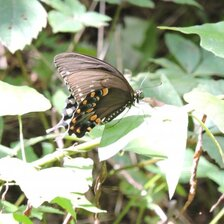

In [ ]:
#checking if image counts are equal
#butterfly_images

def equal_images(images_dir, labels_df):
    len_images_dir = len(os.listdir(images_dir))
    len_labels_df = len(labels_df)
    if len_images_dir == len_labels_df:
        print("Both have same number of images : ", len_images_dir)
    else:
        print("Images directory has: ", len_images_dir, " images, while label_df has: ", len_label_df, " images.")
equal_images(images_dir =training_images_dir, labels_df =label_df)

from IPython.display import Image, display
Image(training_images_dir + 'gw47ddbdab.jpg')



Average images per species:  142
Total number of species:  6


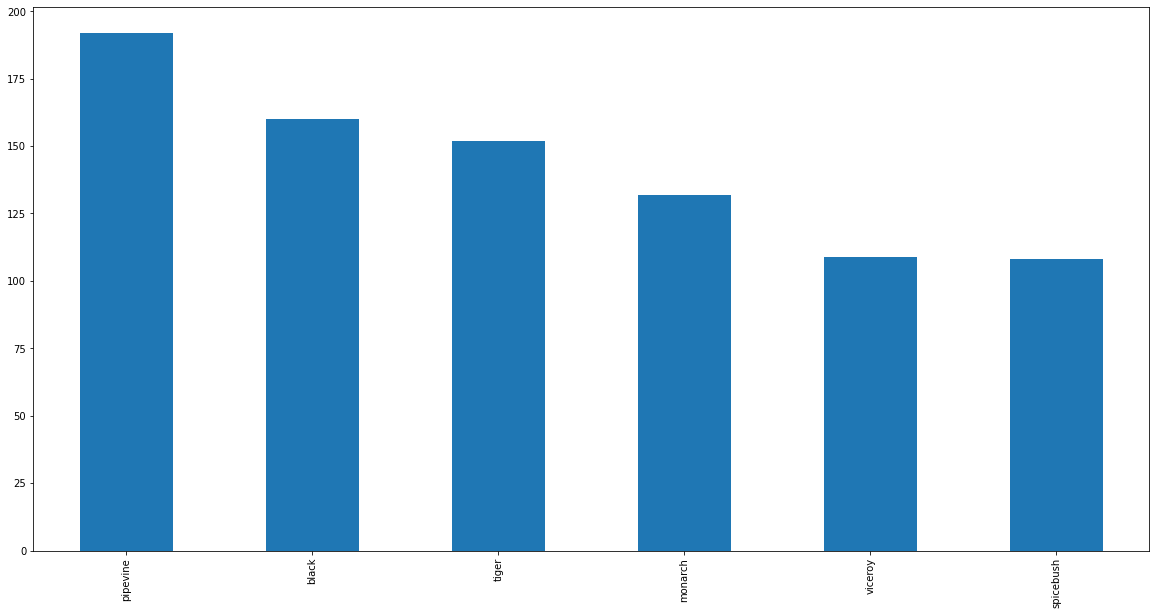

In [ ]:
#Checking how many images per butterfly species
label_df['name'].value_counts().plot.bar(figsize=(20,10))
print("Average images per species: ", int(label_df['name'].value_counts().sum()/len(label_df['name'].unique())))
print("Total number of species: ", len(label_df['name'].unique()))

In [ ]:
#Process Training and testing data
filenames = [training_images_dir + fname + '.jpg' for fname in label_df['image']]
filenames[:10]

#Creating class names 
class_names = label_df['Yum ?'].unique()
print(class_names)
target_label = [yum_yuck for yum_yuck in label_df['Yum ?']]
print(target_label[0])

#converting labels to one-hot encoding
yum_yuck_encoded = [label == np.array(class_names) for label in target_label]
#print(yum_yuck_encoded)

#turning boolean array into integers
print(target_label[0])
print(np.where(class_names == target_label[0])[0][0])
print(yum_yuck_encoded[0].argmax())
print(yum_yuck_encoded[0].astype(int))

['yuck' 'yum']
yuck
yuck
0
0
[1 0]


In [ ]:
#Splitting train / test data
from sklearn.model_selection import train_test_split

#Experimenting with small data sample

img_num = 200

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(filenames[:img_num], yum_yuck_encoded[:img_num], test_size=0.25, random_state=6)

len(X_train), len(X_test), len(y_train), len(y_test)

#Checking the training data
X_train[0], y_train[0]

('../4661Final Project/archive/data/butterfly_mimics/images/mx4fe59321.jpg',
 array([ True, False]))

Image Shape:  (224, 224, 3)


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.8078432 , 0.854902  , 0.57254905],
         [0.8078432 , 0.854902  , 0.57254905],
         [0.8078432 , 0.8470589 , 0.5686275 ],
         ...,
         [0.627451  , 0.7058824 , 0.43529415],
         [0.627451  , 0.7058824 , 0.43529415],
         [0.62352943, 0.7019608 , 0.43137258]],
 
        [[0.80392164, 0.85098046, 0.5686275 ],
         [0.80392164, 0.85098046, 0.5686275 ],
         [0.8078432 , 0.8470589 , 0.5686275 ],
         ...,
         [0.627451  , 0.7058824 , 0.43529415],
         [0.627451  , 0.7058824 , 0.43529415],
         [0.62352943, 0.7019608 , 0.43137258]],
 
        [[0.80392164, 0.85098046, 0.56078434],
         [0.80392164, 0.85098046, 0.56078434],
         [0.80392164, 0.8431373 , 0.5568628 ],
         ...,
         [0.627451  , 0.7058824 , 0.43529415],
         [0.62352943, 0.7019608 , 0.43137258],
         [0.62352943, 0.7019608 , 0.43137258]],
 
        ...,
 
        [[0.7686275 , 0.7803922 

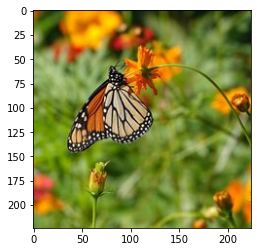

In [ ]:
#Preprocessing the Dataset into Tensorflow format: 
#Take image file path, Read image from path using Tensorflow, Convert image to Tensor, Resize image into Tensor Shao (224,224,3), then return image

#Random image and its shape
from matplotlib.pyplot import imread

img = imread(X_train[0])
plt.imshow(img)
print("Image Shape: ", img.shape)

#Converting image to TF tensor
tf.constant(img)

#normalizing our images
tf.image.convert_image_dtype(img, tf.float32)

img_size = 224

#Preprocessing function: will read image, resize and return into TF format
def img_process(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img

#creating a function to return a tuple (image, label). Takes an image file path and the associated label, processes the image and returns a tuple of (image, label)
def get_image_label(img_path, label):
    image = img_process(img_path)
    return image, label

get_image_label(X_train[10], y_train[10])
    

In [ ]:
#Creating the data batches
#Using a funciton to create dataset batches. Will help to accept training images and labels. Shuffles data if it is training data,
#but not if it is testing data. Also accept test data as input (no label).

batch_size = 32
def create_batch(X, y = None, batch_sz = batch_size, valid_data = False, test_data = False):
    if test_data:
        print("Creating Test data")
        test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        test_data = test_data.map(img_process).batch(batch_size)
        return test_data
    if valid_data:
        print("Creating validation data")
        valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        valid_data = valid_data.map(get_image_label).batch(batch_size)
        return valid_data
    else: 
        print("Creating Training Data") 
        train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))).shuffle(buffer_size = len(X))
        train_data = train_data.map(get_image_label).batch(batch_size) 
        return train_data 
    
train_data = create_batch(X_train, y_train)
valid_data = create_batch(X_test, y_test, valid_data = True)

sample = next(iter(train_data))
sample[0][0]

Creating Training Data
Creating validation data


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8078432 , 0.854902  , 0.57254905],
        [0.8078432 , 0.854902  , 0.57254905],
        [0.8078432 , 0.8470589 , 0.5686275 ],
        ...,
        [0.627451  , 0.7058824 , 0.43529415],
        [0.627451  , 0.7058824 , 0.43529415],
        [0.62352943, 0.7019608 , 0.43137258]],

       [[0.80392164, 0.85098046, 0.5686275 ],
        [0.80392164, 0.85098046, 0.5686275 ],
        [0.8078432 , 0.8470589 , 0.5686275 ],
        ...,
        [0.627451  , 0.7058824 , 0.43529415],
        [0.627451  , 0.7058824 , 0.43529415],
        [0.62352943, 0.7019608 , 0.43137258]],

       [[0.80392164, 0.85098046, 0.56078434],
        [0.80392164, 0.85098046, 0.56078434],
        [0.80392164, 0.8431373 , 0.5568628 ],
        ...,
        [0.627451  , 0.7058824 , 0.43529415],
        [0.62352943, 0.7019608 , 0.43137258],
        [0.62352943, 0.7019608 , 0.43137258]],

       ...,

       [[0.7686275 , 0.7803922 , 0.69803923],
        [0.76

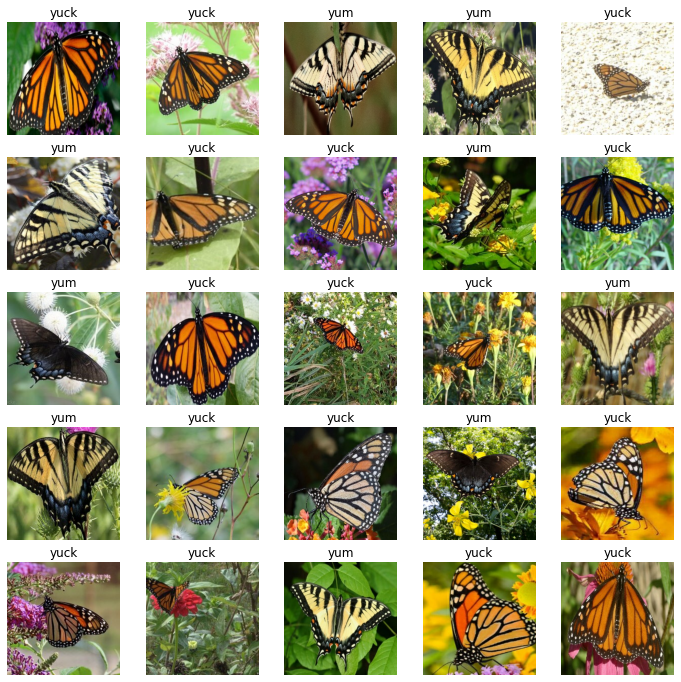

In [ ]:
#Next, we will use a function to visualize the images
def show_imgs(images, label):
    plt.figure(figsize = (12,12))
    for i in range(0,25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[tf.argmax(label[i])])
        plt.axis("off")
        
#visualizing training images form the training data batch
train_imgs, train_labels = next(train_data.as_numpy_iterator())
show_imgs(train_imgs, train_labels)

        

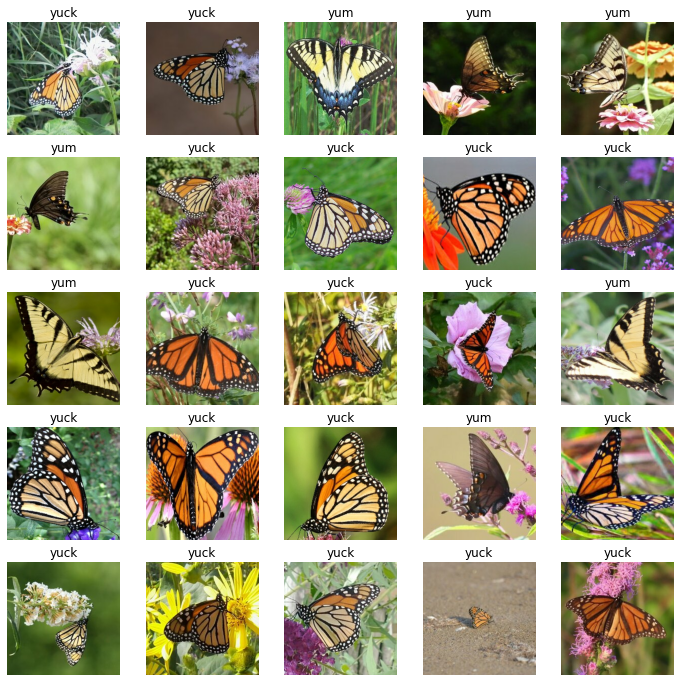

In [ ]:
#Visualizing images from validation data batch
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_imgs(val_images, val_labels)

In [ ]:
#to create the neural network, can classify images into 1000 object categories, inlcuding many animals
#Using keras library 

import tensorflow as tf 
from tensorflow.keras import layers 

def make_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False, classes = len(class_names)) 
    base_model.trainable = False 
    inputs = layers.Input(shape = (224,224,3))
    x = base_model(inputs, training = False) 
    x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling")(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)
    ModelYumYuck = tf.keras.Model(inputs, outputs) 

    ModelYumYuck.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"]) 

    return ModelYumYuck

model = make_model()
EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, baseline=None, restore_best_weights=True)


In [ ]:
ModelYumYuck_History = model.fit(train_data, steps_per_epoch = len(train_data), epochs = 5, 
                        validation_data= valid_data, validation_steps = len(valid_data),callbacks = [EarlyStoppingCallbacks])

model.evaluate(valid_data)

Epoch 1/5
5/5 [==============================] - 6s 938ms/step - loss: 0.4803 - accuracy: 0.7800 - val_loss: 0.3153 - val_accuracy: 0.8600
Epoch 2/5
5/5 [==============================] - 4s 788ms/step - loss: 0.2940 - accuracy: 0.8867 - val_loss: 0.2057 - val_accuracy: 0.9200
Epoch 3/5
5/5 [==============================] - 4s 768ms/step - loss: 0.1907 - accuracy: 0.9600 - val_loss: 0.1543 - val_accuracy: 0.9600
Epoch 4/5
5/5 [==============================] - 4s 797ms/step - loss: 0.1155 - accuracy: 0.9800 - val_loss: 0.1221 - val_accuracy: 0.9600
Epoch 5/5
2/2 [==============================] - 1s 351ms/step - loss: 0.0894 - accuracy: 0.9800


[0.08939856290817261, 0.9800000190734863]

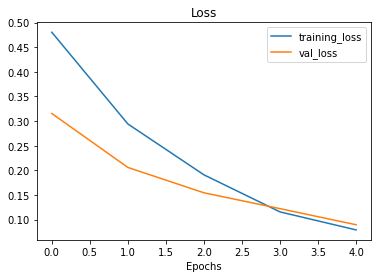

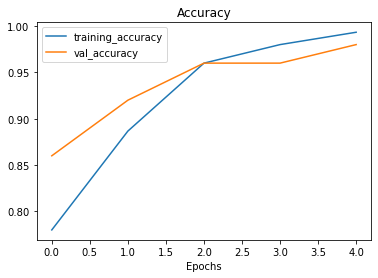

In [ ]:
#Returns separate loss curves for training and validation metrics. history: TensorFlow model History object

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
    
plot_loss_curves(ModelYumYuck_History)

In [ ]:
#Making prediction on the validation data

predictions = model.predict(valid_data)
predictions

2/2 [==============================] - 2s 361ms/step


array([[0.9727411 , 0.02725888],
       [0.9834114 , 0.01658867],
       [0.04412269, 0.9558773 ],
       [0.58371925, 0.4162808 ],
       [0.33470437, 0.66529554],
       [0.20002973, 0.79997027],
       [0.983878  , 0.01612194],
       [0.9699346 , 0.0300655 ],
       [0.9975333 , 0.00246667],
       [0.9862918 , 0.01370821],
       [0.02786494, 0.97213507],
       [0.990725  , 0.00927505],
       [0.977457  , 0.02254303],
       [0.96568066, 0.0343193 ],
       [0.09854527, 0.90145475],
       [0.96732104, 0.03267892],
       [0.98685294, 0.01314703],
       [0.9511133 , 0.04888667],
       [0.01176454, 0.9882355 ],
       [0.9515672 , 0.04843284],
       [0.93055314, 0.06944691],
       [0.96755713, 0.03244289],
       [0.9920536 , 0.00794635],
       [0.9368869 , 0.06311307],
       [0.95497346, 0.04502653],
       [0.9845083 , 0.01549175],
       [0.9920265 , 0.00797354],
       [0.9606406 , 0.03935931],
       [0.6832692 , 0.31673086],
       [0.09063257, 0.90936744],
       [0.

In [ ]:
predictions.shape

# First prediction
print(predictions[0])
print("Probability of prediction: ", np.max(predictions[0])) # the max probability value predicted by the model
print("Sum: ", np.sum(predictions[0])) # because we used softmax activation in our model, this will be close to 1
print("Max index: ", np.argmax(predictions[0])) # the index of where the max value in predictions[0] occurs
print("Predicted label: ", class_names[np.argmax(predictions[0])]) # the predicted label

[0.9727411  0.02725888]
Probability of prediction:  0.9727411
Sum:  1.0
Max index:  0
Predicted label:  yuck


In [ ]:
# Turning prediction probabilities into label for ease of understanding
def get_pred_label(prediction_probabilities):
    
  return class_names[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'yuck'

In [ ]:
#creating the following function to unbatch a batched dataset.Takes a batched dataset of (image, label) Tensors and returns separate arrays
#of images and labels.

def unbatchify(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(class_names[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.16470589, 0.28235295, 0.2509804 ],
         [0.15686275, 0.27450982, 0.24313727],
         [0.23529413, 0.36078432, 0.31764707],
         ...,
         [0.34901962, 0.48627454, 0.36078432],
         [0.30980393, 0.4666667 , 0.32941177],
         [0.28235295, 0.44705886, 0.30588236]],
 
        [[0.13333334, 0.2392157 , 0.21176472],
         [0.15294118, 0.27058825, 0.2392157 ],
         [0.10196079, 0.21960786, 0.18039216],
         ...,
         [0.26666668, 0.39607847, 0.28235295],
         [0.29803923, 0.4431373 , 0.32156864],
         [0.23137257, 0.38823533, 0.25490198]],
 
        [[0.08627451, 0.18431373, 0.16078432],
         [0.07058824, 0.1764706 , 0.14901961],
         [0.0627451 , 0.16862746, 0.13333334],
         ...,
         [0.2784314 , 0.38823533, 0.3019608 ],
         [0.26666668, 0.3803922 , 0.29411766],
         [0.28627452, 0.41176474, 0.31764707]],
 
        ...,
 
        [[0.42352945, 0.4784314 , 0.3803922 ],
         [0.25882354, 0.3137255 , 0.21568

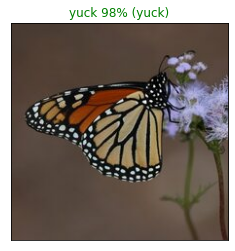

In [ ]:
#function to view the prediction, ground truth label and image for sample n.

def plot_pred(prediction_probabilities, labels, images, n=1):
    
  prediction_prob, actual_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the prediction label
  prediction_label = get_pred_label(prediction_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if prediction_label == actual_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(prediction_label, np.max(prediction_prob)*100, actual_label), color=color)

# Example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions, labels=val_labels,images=val_images)

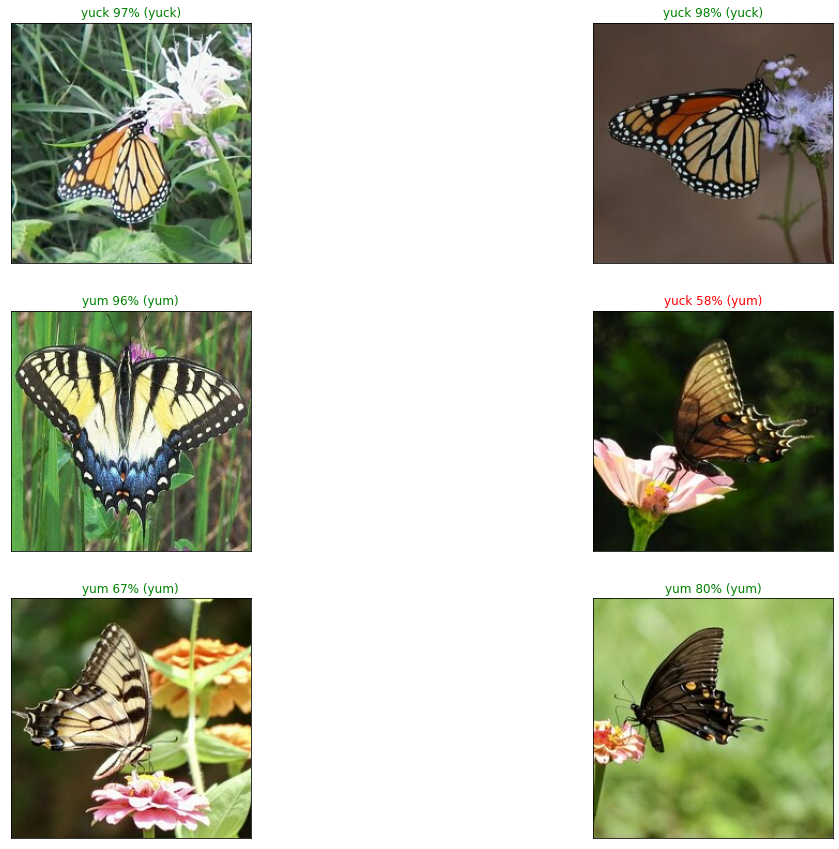

In [ ]:
#Checking a few predictions and their different values
i_mult = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(5 * 2 * num_cols, 5 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=i+i_mult)
  #plt.subplot(num_rows, 2 * num_cols, 2 * i+2)
  #plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
#Now we can train on the full dataset
len(filenames), len(yum_yuck_encoded)

#create training batch of data
entire_dataset = create_batch(filenames, yum_yuck_encoded)

#Create training data
ModelYumYuck_AllData = make_model()
ModelYumYuck_AllData.summary()

#Train Final Model
FinalModel = ModelYumYuck_AllData.fit(entire_dataset, steps_per_epoch = len(entire_dataset), epochs = 10, callbacks = [EarlyStoppingCallbacks])

Creating Training Data
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 dropout_13 (Dropout)        (None, 1280)              0         
                                                                 
 dense_13 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable p

Creating Test data
12/12 [==============================] - 7s 529ms/step


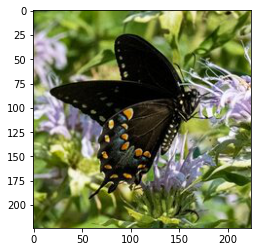

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_filenames = [testing_images_dir + fname for fname in os.listdir(testing_images_dir)]

test_filenames[:10]

img = imread(test_filenames[44])
plt.imshow(img)

len(test_filenames)

test_data = create_batch(X=test_filenames, test_data=True)
test_predictions = ModelYumYuck_AllData.predict(test_data, verbose=1)

In [ ]:
preds_df = pd.DataFrame(columns=["image"] + list(class_names))
preds_df.head()

preds_df["image"] = [os.path.splitext(path)[0] for path in os.listdir(testing_images_dir)]
preds_df.head()

preds_df[list(class_names)] = test_predictions
preds_df[::10]

,image,yuck,yum
0,stbdd27ebf,0.992012,0.007988
10,rgc26dcbc3,0.059032,0.940968
20,qv72a1814d,0.102346,0.897654
30,qz645577a4,0.001833,0.998167
40,vm2e9d048e,0.011154,0.988846
50,tue8d8bd82,0.431229,0.568771
60,ss0c626929,0.197350,0.802650
70,iwc69dd007,0.020554,0.979446
80,tzfcbe1351,0.996751,0.003249
90,xo46301645,0.007721,0.992279
